In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
root = os.getcwd()
dirfile=root+"/NN_train_data"
print(os.listdir(dirfile))

os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Any results you write to the current directory are saved as output.

['.DS_Store', 'X_train.csv', 'y_train.csv']


In [2]:
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Activation,Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [3]:
x_train = pd.read_csv(dirfile+'/X_train.csv')
y_train = pd.read_csv(dirfile+'/y_train.csv')

In [4]:
x_train.groupby('series_id').count().head(3)

,row_id,measurement_number,Unnamed: 0,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y
series_id,,,,,,,,,,,,
0,128,128,128,128,128,128,128,128,128,128,128,128
1,128,128,128,128,128,128,128,128,128,128,128,128
2,128,128,128,128,128,128,128,128,128,128,128,128


In [5]:
y_train['group_id'].unique()

array([2, 1, 0])

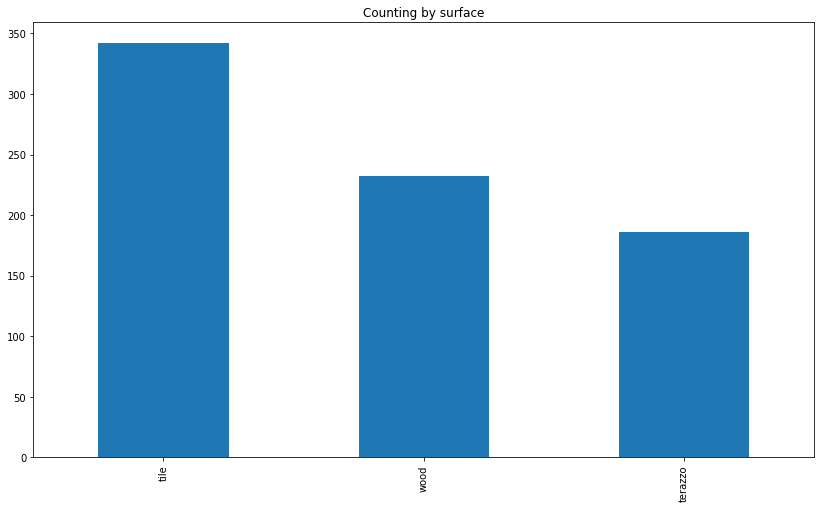

In [6]:
plt.figure(figsize = (10,10))
ax = y_train['surface'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Counting by surface")

In [7]:
x_train = x_train.drop(['row_id', 'series_id', 'measurement_number'], axis=1)
y_train = y_train.drop(['group_id', 'series_id'], axis=1)
sample_num=760
x_train =x_train.values.reshape((sample_num, 128, 10)) #values = to_numpy() (# of samples, timesteps, features)
y_train =y_train.values.reshape((sample_num, 1))

In [8]:
#Transforms non-numerical tags to numerical ones. 
#We cannot use group_id in Y_train because there are multiple group_id for an identical ground type.
le = LabelEncoder()
print (y_train)
y_train = le.fit_transform(y_train)
print('y_train shape is {}'.format(str(y_train.shape)))
print (y_train)

[['wood']
 ['tile']
 ['tile']
 ['tile']
 ['tile']
 ['tile']
 ['tile']
 ['terazzo']
 ['wood']
 ['tile']
 ['wood']
 ['tile']
 ['tile']
 ['tile']
 ['tile']
 ['terazzo']
 ['tile']
 ['tile']
 ['tile']
 ['wood']
 ['terazzo']
 ['wood']
 ['wood']
 ['tile']
 ['wood']
 ['tile']
 ['tile']
 ['tile']
 ['terazzo']
 ['tile']
 ['wood']
 ['wood']
 ['tile']
 ['tile']
 ['wood']
 ['tile']
 ['tile']
 ['wood']
 ['tile']
 ['wood']
 ['tile']
 ['tile']
 ['tile']
 ['tile']
 ['wood']
 ['tile']
 ['tile']
 ['wood']
 ['tile']
 ['tile']
 ['tile']
 ['wood']
 ['tile']
 ['tile']
 ['tile']
 ['wood']
 ['wood']
 ['terazzo']
 ['terazzo']
 ['wood']
 ['wood']
 ['tile']
 ['terazzo']
 ['tile']
 ['terazzo']
 ['terazzo']
 ['terazzo']
 ['tile']
 ['tile']
 ['tile']
 ['terazzo']
 ['wood']
 ['wood']
 ['terazzo']
 ['wood']
 ['wood']
 ['terazzo']
 ['tile']
 ['wood']
 ['wood']
 ['terazzo']
 ['terazzo']
 ['tile']
 ['terazzo']
 ['tile']
 ['tile']
 ['terazzo']
 ['tile']
 ['wood']
 ['tile']
 ['tile']
 ['wood']
 ['tile']
 ['wood']
 ['terazz

/Users/sungwonhwang/opt/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
x_tr, x_te,y_tr, y_te = train_test_split(x_train, y_train, test_size = 0.15)
print(x_tr.shape, y_tr.shape, x_te.shape, y_te.shape)

((646, 128, 10), (646,), (114, 128, 10), (114,))


In [10]:
# padding = 'same' -> dimension is preserved with zero padding
model = Sequential()
model.add(Conv1D(filters = 128, kernel_size = 7, strides = 1, padding = 'same', input_shape = (128,10),activation='relu'))
model.add(Conv1D(filters = 128, kernel_size = 7, strides = 1, padding = 'same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters = 64, kernel_size = 5, strides = 1, padding = 'same',activation='relu'))
model.add(Conv1D(filters = 64, kernel_size = 5, strides = 1, padding = 'same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same',activation='relu'))
model.add(Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(3, activation='softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 128, 128)          9088      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 128)          114816    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 64, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 64, 64)            41024     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 64, 64)            20544     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 32, 32)            6

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model_fit = model.fit(x_tr, y_tr,
                    batch_size=64,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_te, y_te))

Train on 646 samples, validate on 114 samples
Epoch 1/50
646/646 [==============================] - 4s 6ms/sample - loss: 128.8096 - accuracy: 0.3638 - val_loss: 3.3314 - val_accuracy: 0.4211
Epoch 2/50
646/646 [==============================] - 2s 2ms/sample - loss: 10.4135 - accuracy: 0.3576 - val_loss: 6.1205 - val_accuracy: 0.3421
Epoch 3/50
646/646 [==============================] - 2s 2ms/sample - loss: 3.9596 - accuracy: 0.4087 - val_loss: 1.4644 - val_accuracy: 0.2368
Epoch 4/50
646/646 [==============================] - 2s 2ms/sample - loss: 2.0528 - accuracy: 0.3452 - val_loss: 1.1737 - val_accuracy: 0.4298
Epoch 5/50
646/646 [==============================] - 2s 3ms/sample - loss: 1.2903 - accuracy: 0.4211 - val_loss: 1.0102 - val_accuracy: 0.4035
Epoch 6/50
646/646 [==============================] - 2s 3ms/sample - loss: 1.1043 - accuracy: 0.4381 - val_loss: 1.0492 - val_accuracy: 0.4474
Epoch 7/50
646/646 [==============================] - 2s 3ms/sample - loss: 1.0270 - ac

In [14]:
x_test = x_train.drop(['row_id', "series_id", "measurement_number"], axis=1)
x_test =x_test.values.reshape((sample_num, 128, 10))

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [62]:
prediction = model.predict(x_test)
prediction=np.argmax(prediction, axis=1)
y_preds = le.inverse_transform(prediction)

In [64]:
submission = pd.read_csv(dirfile+"/sample_submission.csv")
submission['surface'] = y_preds
submission.to_csv('cnn_with_Fully_connected_layers.csv', index=False)